# data1030 project
## EDA

In [11]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.11 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.11.4"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.11"):
    print(FAIL, "Python version 3.11 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "1.24.4", 'matplotlib': "3.7.2",'sklearn': "1.3.0", 
                'pandas': "2.0.3",'xgboost': "1.7.6", 'shap': "0.42.1", 'seaborn': "0.12.2"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.11.4

[ OK ] numpy version 1.24.4 is installed.
[ OK ] matplotlib version 3.7.2 is installed.
[ OK ] sklearn version 1.3.0 is installed.
[ OK ] pandas version 2.0.3 is installed.
[ OK ] xgboost version 1.7.6 is installed.
[ OK ] shap version 0.42.1 is installed.
[ OK ] seaborn version 0.12.2 is installed.


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

df = pd.read_csv("data/Building_Permits.csv")
np.random.seed(0)

Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.


Index(['Permit Number', 'Permit Type', 'Permit Type Definition',
       'Permit Creation Date', 'Block', 'Lot', 'Street Number',
       'Street Number Suffix', 'Street Name', 'Street Suffix', 'Unit',
       'Unit Suffix', 'Description', 'Current Status', 'Current Status Date',
       'Filed Date', 'Issued Date', 'Completed Date',
       'First Construction Document Date', 'Structural Notification',
       'Number of Existing Stories', 'Number of Proposed Stories',
       'Voluntary Soft-Story Retrofit', 'Fire Only Permit',
       'Permit Expiration Date', 'Estimated Cost', 'Revised Cost',
       'Existing Use', 'Existing Units', 'Proposed Use', 'Proposed Units',
       'Plansets', 'TIDF Compliance', 'Existing Construction Type',
       'Existing Construction Type Description', 'Proposed Construction Type',
       'Proposed Construction Type Description', 'Site Permit',
       'Supervisor District', 'Neighborhoods - Analysis Boundaries', 'Zipcode',
       'Location', 'Record ID'],
     


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


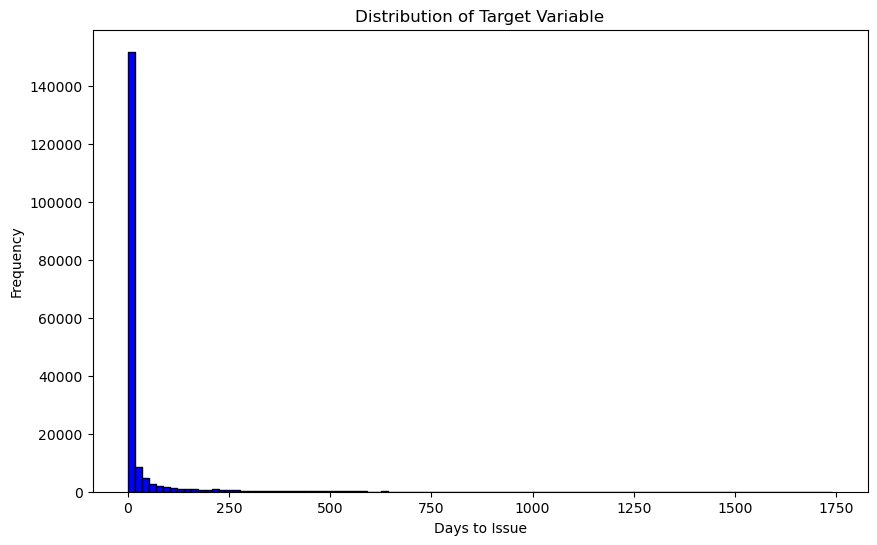

1740
26.054696673189824
0.0


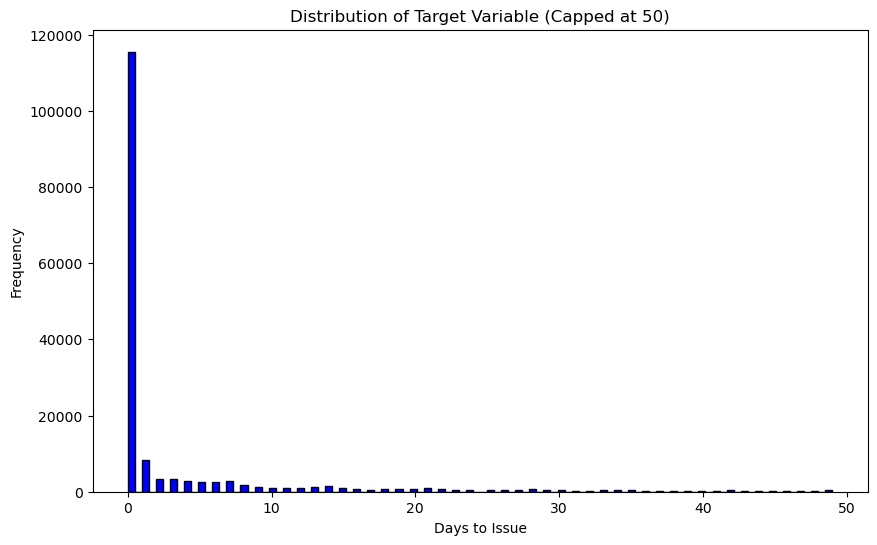

In [53]:
# get a glimpse of data
pd.set_option('display.max_columns', None)
df.sample(5)

# understand the shape of the data and the labels of the columns
print(df.columns)
print(len(df.index))
print(len(df.columns))
# calculating target variable column (number of days between filing a permit and being issued one)
df['days_to_issue'] = pd.to_datetime(df['Issued Date']) - pd.to_datetime(df['Filed Date'])
# setting that column as the "target variable"
target_var = df['days_to_issue']
for i in range(len(target_var)):
    target_var[i] = target_var[i].days
# creating a histogram of the target variable
hist = target_var.plot(kind='hist', figsize=(10, 6), bins=100, color='blue', edgecolor='black')
plt.title('Distribution of Target Variable')
plt.xlabel('Days to Issue')
plt.ylabel('Frequency')
plt.show()

print(target_var.max())
print(target_var.mean())
print(target_var.median())
# target variable ranges from 0 days to 997 days
# regression problem - predicting the number of days between filing a permit and being issued one

# capping target_var at 50 for viz purposes
target_var_50 = target_var.copy()
target_var_50 = target_var_50[target_var_50 < 50]
hist2 = target_var_50.plot(kind='hist', figsize=(10, 6), bins=100, color='blue', edgecolor='black')
plt.title('Distribution of Target Variable (Capped at 50)')
plt.xlabel('Days to Issue')
plt.ylabel('Frequency')
plt.show()



In [54]:
target_var.value_counts()
percent_zero = target_var.value_counts()[0]/len(target_var)
print(target_var.value_counts()[0])
print(percent_zero)

115488
0.580633484162896


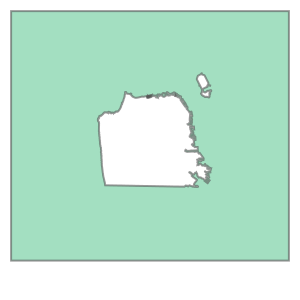

In [85]:
# geographic breakdown of the data
# using geopandas library to plot the data on a map of San Francisco
# https://towardsdatascience.com/making-heat-maps-with-literal-maps-how-to-use-python-to-construct-a-chloropleth-6b65e4e33905
sf_map = gpd.read_file("data/sfoutline.shp")
sf_map['geometry'][0]
# goal for the future...
# pd.set_option('display.max_rows', None)


